# Session 01 - Assignment  

## Introduction

Deep learning is unbeatable in extracting information and discovering patterns in large amounts of data. That's why it can transform sciencefiction-like ideas into real solutions. Think about self-driving cars, face recogntion applications, machine translation and advanced medical diagnosis software.

The goal of this assignment is to get familiar with neural networks, how to build them in Keras and apply them for classification tasks.

The warm-up should increase your insight into the different neural network hyperparameters. The final results are less important compared to the final conclusions you write down in this notebook.

The other excercises should increase your ability to build a data pipeline starting from the raw data up to making accurate predictions.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.image as mpimg
from skimage.io import imread, imshow

# distributions
from scipy.stats import randint
from scipy.stats import uniform


# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image





## Warm-up

The Python code below will generate 1000 data samples (taken from 4 different Gaussian distributions). The data samples consist of two features.
The goal is to train a classical feedforward neural network to classify this data and to
get familiar with the hyperparameters. Write down your findings and conclusions.


from sklearn.datasets i`mport make_blobs
X, y = make_blobs(n_samples=1000, centers=4, center_box = [-10,10],
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y);

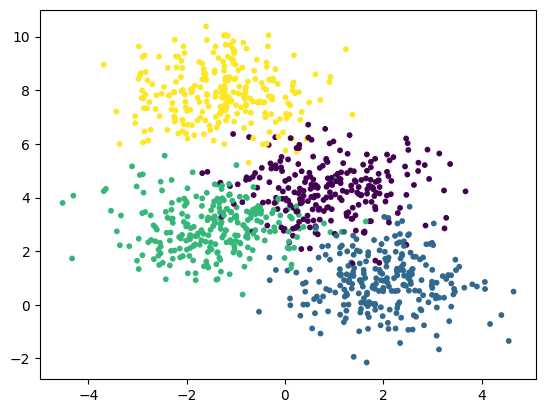

In [ ]:
## Warm-up

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, center_box = (-10,10),random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y);

from above we have these conlusions :

1 = the clusters are mostly seperated but not perfectly , so this overlaps can make it very difficult for classification model to classify them perfectly in that region.

2 = The clusters have different shapes and spreads, which is typical when using Gaussian distributions with the same standard deviation.

**CONCLUSION:**

A feedforward neural network should be able to classify this data reasonably well, but the overlapping regions between clusters could lead to some misclassifications. Adjusting the neural network's complexity (number of layers, neurons) and experimenting with regularization could help improve performance, especially in these ambiguous areas

In [ ]:
# Split into training set and test set
# Use 200 samples for test set
# Use 30 percent of the training set as validation data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 200, random_state =0)

# ---------------------------------------------------
# Normalize the data

#scaler = StandardScaler()

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#----------------------------------------------------
# One-hot encoding of the targets
y_train = to_categorical(y_train)
print(y_train)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


[0, 1, 0, 0] means the sample belongs to class 1.

[0, 0, 0, 1] means the sample belongs to class 3.



**Multiclass Classification:** One-hot encoding is essential for multi-class classification problems like this one. It transforms your target labels into a format that can be used with neural networks, especially when using the softmax activation function in the output layer. This allows the network to predict class probabilities for each sample.


**Training Signals:** Each row (vector) tells the neural network what the true class is for a given sample. The model learns by comparing its predicted probability distribution (via softmax) with the one-hot encoded vector, adjusting its weights to reduce the difference.


**Categorical Cross-Entropy Loss:** With one-hot encoded targets, the model can use categorical cross-entropy as a loss function, which measures how well the predicted probability distribution aligns with the true distribution (one-hot encoded vector). The goal is to minimize this loss during training.

In [ ]:
# NN parameters

batch_size = 32
epochs = 100
dropoutrate = 0.8
input_dim = X_train.shape[1]
activation_hidden = 'relu'
activation_output = 'sigmoid'
initializer = 'RandomUniform'
SGD = tf.keras.optimizers.SGD(learning_rate=0.3)
adam = tf.keras.optimizers.Adam()

model = Sequential()
model.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(40, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(40, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(y_train.shape[1], kernel_initializer=initializer,activation=activation_output))

#
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

# train the model

history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.2476 - loss: 1.3864 - val_accuracy: 0.2542 - val_loss: 1.3864
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2636 - loss: 1.3863 - val_accuracy: 0.2542 - val_loss: 1.3864
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3114 - loss: 1.3862 - val_accuracy: 0.2125 - val_loss: 1.3862
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3197 - loss: 1.3851 - val_accuracy: 0.2292 - val_loss: 1.3854
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3526 - loss: 1.3834 - val_accuracy: 0.5292 - val_loss: 1.3779
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4032 - loss: 1.3665 - val_accuracy: 0.4125 - val_loss: 1.3272
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3889 - loss: 1.3188 - val_accuracy: 0.4333 - val_loss: 1.2073
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4930 - loss: 1.2514 - val_accuracy: 0.4542 - val_loss: 

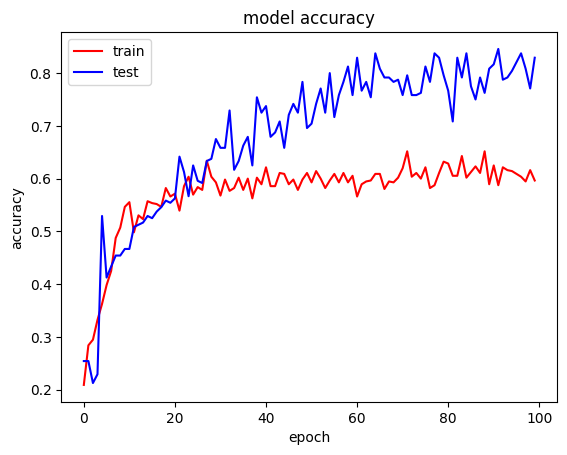

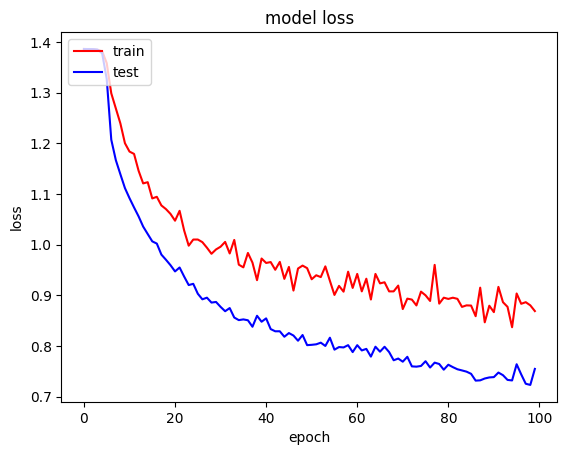

In [ ]:
# Plot history
# Check for underfitting / overfitting based on the model loss history
# Determine the optimal number of training epochs. Use early stopping with model checkpoint saving.

# Accuray
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# due to dropout the accuracy of train in the figure below is gowing down faster than test

Key Observations:

    Training Accuracy (Red Line):
        The training accuracy starts to increase rapidly within the first 20 epochs but then stabilizes at around 0.6.
        After approximately 20 epochs, the training accuracy plateaus and fluctuates around this value, without significant improvement beyond that point. This could indicate that the model is struggling to learn further from the training data due to either high dropout or model complexity limitations.

    Validation Accuracy (Blue Line):
        The validation accuracy (on the test set) increases much faster than the training accuracy and continues to rise, even as training accuracy plateaus.
        The validation accuracy fluctuates significantly but generally increases and reaches up to 0.85 by the end, much higher than the training accuracy.
        The fluctuations suggest that the model's performance on unseen data (validation set) is unstable but generally improving.

Interpretation:

    Generalization Gap: There is a noticeable generalization gap between the training and validation accuracy. Typically, we expect validation accuracy to be slightly lower than training accuracy, but here it's the opposite. This might indicate that:
        The dropout rate (0.8) is too high, causing the model to perform poorly on the training data, but it manages to generalize better on the validation data. With so many neurons being dropped during training, the network is effectively regularized but at the cost of learning capability on the training data.
        Over-regularization: The model may be underfitting the training data due to excessive dropout, which is preventing the model from learning sufficiently from the training set.
    Training Instability: The significant fluctuations in accuracy, especially early on, suggest that the model's training process is unstable, likely due to the high dropout rate. Dropout introduces noise, which is why accuracy can swing significantly between epochs.

Recommendations:

    Reduce Dropout Rate: Dropout at 80% is very high. Consider lowering the dropout rate to around 0.3–0.5 to see if it allows the model to learn more effectively from the training data without overfitting.

    Early Stopping: Since the validation accuracy is fluctuating, you could implement early stopping to avoid unnecessary training. The model likely achieves its best performance between 60 and 80 epochs.

    Increase Model Complexity: If reducing dropout doesn't improve the training accuracy, consider adding more neurons or layers to the network to increase its capacity to learn from the training data.

    Learning Rate Adjustment: A high learning rate may also cause the instability. Try reducing the learning rate of the optimizer if the model remains unstable after adjusting dropout.

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


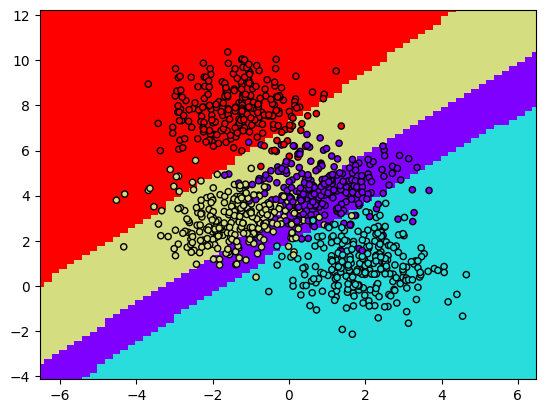

In [ ]:
h = 0.2
x1_min = X[:,0].min()-2
x1_max = X[:,0].max()+2
x2_min = X[:,1].min()-2
x2_max = X[:,1].max()+2

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

# Stack the points into a grid
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Predict class probabilities
Z_prob = model.predict(xy)

# Convert probabilities to class labels (using argmax)
Zn = np.argmax(Z_prob, axis=1).reshape(xx.shape)

# Plot decision boundary
plt.pcolormesh(xx, yy, Zn, cmap='rainbow')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap='rainbow')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


In [ ]:
# # Evaluation on the test set

# y_pred = model.predict_classes(X_test)
# print('\n')
# print(classification_report(y_test, y_pred))

# cf = confusion_matrix(y_test, y_pred)

# print(cf)
# print(accuracy_score(y_test, y_pred) * 100)

# Evaluation on the test set (multi-class classification)

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels using argmax
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report and confusion matrix
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# note= in binary classififcaation no argmax function

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


              precision    recall  f1-score   support

           0       0.65      0.45      0.53        44
           1       0.89      0.98      0.93        51
           2       0.56      0.71      0.62        48
           3       0.94      0.86      0.90        57

    accuracy                           0.77       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.77      0.77      0.76       200

[[20  5 19  0]
 [ 1 50  0  0]
 [10  1 34  3]
 [ 0  0  8 49]]
Accuracy: 76.50%


Why is learning rate important?

The learning rate controls the size of the steps that the optimizer takes to minimize the loss function.
A high learning rate can cause the model to converge too quickly to a suboptimal solution or make the training process unstable (leading to high oscillations).
A low learning rate can make the model converge very slowly, or get stuck in local minima, requiring more epochs to learn effectively.

1. Change the learning rate (with SGD) and examine the effect on the learning curve.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.2498 - loss: 1.3893 - val_accuracy: 0.2125 - val_loss: 1.3887
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2218 - loss: 1.3894 - val_accuracy: 0.2125 - val_loss: 1.3923
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2535 - loss: 1.3904 - val_accuracy: 0.2125 - val_loss: 1.3869
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2547 - loss: 1.3851 - val_accuracy: 0.2125 - val_loss: 1.3933
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2712 - loss: 1.3877 - val_accuracy: 0.2125 - val_loss: 1.3904
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2147 - loss: 1.3915 - val_accuracy: 0.2125 - val_loss: 1.3975
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2553 - loss: 1.3934 - val_accuracy: 0.2125 - val_loss: 1.3911
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2514 - loss: 1.3866 - val_accuracy: 0.2125 -

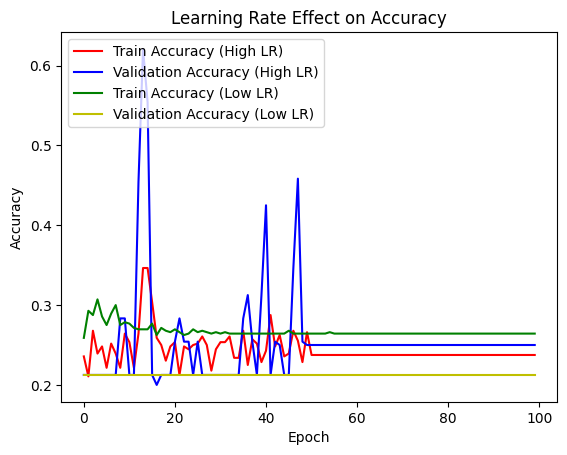

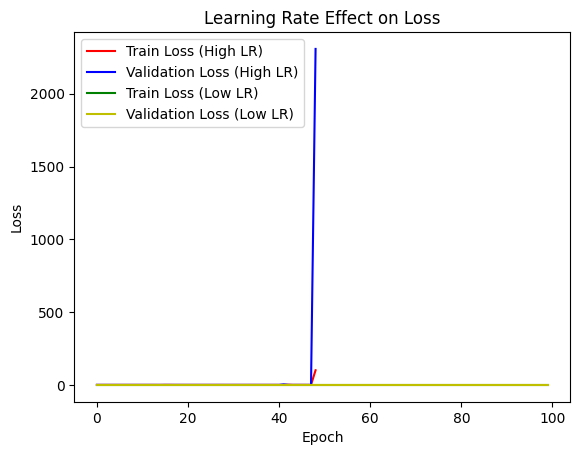

In [ ]:
# Experiment 1: High learning rate
high_lr = 0.5
sgd_high_lr = tf.keras.optimizers.SGD(learning_rate=high_lr)

# Re-compile the model with high learning rate
model_high_lr = Sequential()
model_high_lr.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model_high_lr.add(Dropout(dropoutrate))
model_high_lr.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model_high_lr.add(Dropout(dropoutrate))
model_high_lr.add(Dense(40, kernel_initializer=initializer,activation=activation_hidden))
model_high_lr.add(Dropout(dropoutrate))
model_high_lr.add(Dense(40, kernel_initializer=initializer,activation=activation_hidden))
model_high_lr.add(Dropout(dropoutrate))
model_high_lr.add(Dense(y_train.shape[1], kernel_initializer=initializer,activation=activation_output))

# Compile the model
model_high_lr.compile(loss='categorical_crossentropy', optimizer=sgd_high_lr, metrics=['accuracy'])

# Train the model
history_high_lr = model_high_lr.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=1)

# Experiment 2: Low learning rate
low_lr = 0.001
sgd_low_lr = tf.keras.optimizers.SGD(learning_rate=low_lr)

# Re-compile the model with low learning rate
model_low_lr = Sequential()
model_low_lr.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model_low_lr.add(Dropout(dropoutrate))
model_low_lr.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model_low_lr.add(Dropout(dropoutrate))
model_low_lr.add(Dense(40, kernel_initializer=initializer,activation=activation_hidden))
model_low_lr.add(Dropout(dropoutrate))
model_low_lr.add(Dense(40, kernel_initializer=initializer,activation=activation_hidden))
model_low_lr.add(Dropout(dropoutrate))
model_low_lr.add(Dense(y_train.shape[1], kernel_initializer=initializer,activation=activation_output))

# Compile the model
model_low_lr.compile(loss='categorical_crossentropy', optimizer=sgd_low_lr, metrics=['accuracy'])

# Train the model
history_low_lr = model_low_lr.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=1)

# Plot comparison of learning curves

# High learning rate
plt.plot(history_high_lr.history['accuracy'], 'r', label='Train Accuracy (High LR)')
plt.plot(history_high_lr.history['val_accuracy'], 'b', label='Validation Accuracy (High LR)')

# Low learning rate
plt.plot(history_low_lr.history['accuracy'], 'g', label='Train Accuracy (Low LR)')
plt.plot(history_low_lr.history['val_accuracy'], 'y', label='Validation Accuracy (Low LR)')

plt.title('Learning Rate Effect on Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss curves for comparison
plt.plot(history_high_lr.history['loss'], 'r', label='Train Loss (High LR)')
plt.plot(history_high_lr.history['val_loss'], 'b', label='Validation Loss (High LR)')
plt.plot(history_low_lr.history['loss'], 'g', label='Train Loss (Low LR)')
plt.plot(history_low_lr.history['val_loss'], 'y', label='Validation Loss (Low LR)')

plt.title('Learning Rate Effect on Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Conclusion:

High Learning Rate (0.5):

This setting made the model unstable, causing the loss to explode. The model diverged rather than converging, as seen by the sharp spike in the validation loss. A learning rate of 0.5 is likely too high for this problem with SGD.

Low Learning Rate (0.001):

The model converges smoothly without instability. However, a learning rate this low might make the training process slower than necessary. Increasing it slightly (e.g., to 0.01 or 0.05) could speed up convergence while maintaining stability.


Recommendations:

Choose a Moderate Learning Rate: A learning rate between 0.01 and 0.05 would likely balance the stability and speed of convergence, avoiding the instability seen with a high learning rate while still achieving faster convergence than a very low learning rate.

Experiment with Learning Rate Schedulers:

To achieve a balance, you could use a learning rate scheduler that starts with a higher learning rate and gradually reduces it as the training progresses. This allows the model to learn quickly in the beginning and fine-tune in later epochs.



2. Try different optimizers: SGD, Adam, RMSProp, Adagrad, ... (https://keras.io/optimizers/). Write down some conclusions.


Commonly Used Optimizers in Keras:

    SGD (Stochastic Gradient Descent):

Description: The simplest optimization algorithm. It updates weights based on a fraction of the data in each batch.
Pros: Often yields good results on convex problems or when combined with techniques like momentum.
Cons: Sensitive to learning rate, and may converge slowly or get stuck in local minima.

    Adam (Adaptive Moment Estimation):
Description: Combines the benefits of two other optimizers, AdaGrad and RMSProp. Adam adapts the learning rate for each parameter individually, based on estimates of the first and second moments of gradients.
Pros: Works well with sparse data and non-convex optimization problems. It’s generally robust and converges faster.
Cons: Can overfit if the learning rate is too high and might not generalize as well in some cases.

    RMSProp (Root Mean Square Propagation):
Description: Adapts the learning rate for each parameter by dividing the learning rate by the average of recent magnitudes of gradients for each weight.
Pros: Effective for problems with non-stationary objectives and often works well for recurrent neural networks.
Cons: Not as effective with sparse data and might not generalize as well as Adam

    Adagrad (Adaptive Gradient Algorithm):
Description: Adjusts the learning rate based on the parameters, adapting the learning rate according to the gradients.
Pros: Suitable for sparse data and frequently effective for NLP tasks.
Cons: The learning rate keeps decaying, which may cause the model to stop learning after a certain point.

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

optimizers = {
    'SGD': SGD(learning_rate=0.01),
    'Adam': Adam(),
    'RMSProp': RMSprop(),
    'Adagrad': Adagrad()
}

history_dict = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer")

    # Define the model
    model = Sequential()
    model.add(Dense(40, input_dim=input_dim, kernel_initializer=initializer, activation=activation_hidden))
    model.add(Dropout(dropoutrate))
    model.add(Dense(40, kernel_initializer=initializer, activation=activation_hidden))
    model.add(Dropout(dropoutrate))
    model.add(Dense(40, kernel_initializer=initializer, activation=activation_hidden))
    model.add(Dropout(dropoutrate))
    model.add(Dense(40, kernel_initializer=initializer, activation=activation_hidden))
    model.add(Dropout(dropoutrate))
    model.add(Dense(y_train.shape[1], kernel_initializer=initializer, activation='softmax'))  # Softmax for multi-class

    # Compile the model with the optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=batch_size, verbose=0)
    history_dict[opt_name] = history  # Save history for plotting

    # Evaluate on test set
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    print(f"\n{opt_name} Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))



Training with SGD optimizer
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

SGD Test Accuracy: 25.50%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.26      1.00      0.41        51
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        57

    accuracy                           0.26       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.07      0.26      0.10       200


Training with Adam optimizer


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Adam Test Accuracy: 66.50%
              precision    recall  f1-score   support

           0       0.44      0.09      0.15        44
           1       0.91      0.96      0.93        51
           2       0.46      0.48      0.47        48
           3       0.66      1.00      0.79        57

    accuracy                           0.67       200
   macro avg       0.62      0.63      0.59       200
weighted avg       0.63      0.67      0.61       200


Training with RMSProp optimizer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



RMSProp Test Accuracy: 76.00%
              precision    recall  f1-score   support

           0       0.65      0.39      0.49        44
           1       0.91      0.96      0.93        51
           2       0.64      0.60      0.62        48
           3       0.76      1.00      0.86        57

    accuracy                           0.76       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.75      0.76      0.74       200


Training with Adagrad optimizer


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Adagrad Test Accuracy: 25.50%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.26      1.00      0.41        51
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        57

    accuracy                           0.26       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.07      0.26      0.10       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


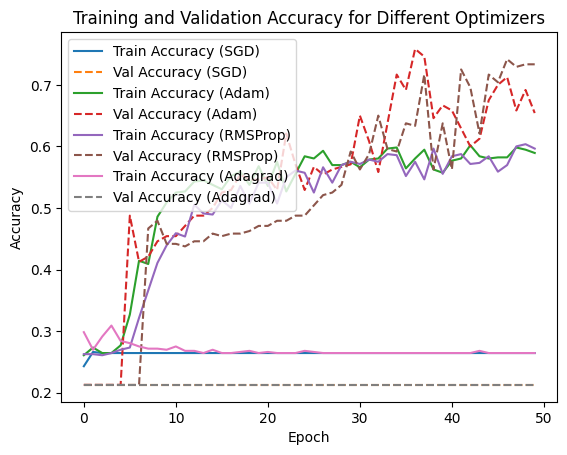

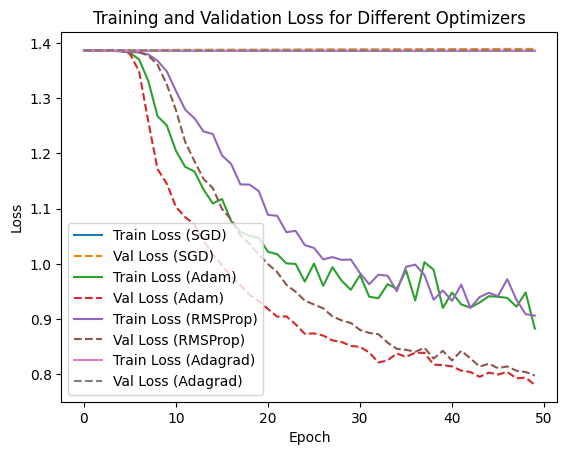

In [ ]:
# Plot accuracy
for opt_name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({opt_name})')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Val Accuracy ({opt_name})')

plt.title('Training and Validation Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
for opt_name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({opt_name})')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss ({opt_name})')

plt.title('Training and Validation Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plot analysis:


1 = Accuracy Plot Analysis:

1-1 = ADAM:

Training Accuracy (Red, solid line): Adam shows rapid improvement in accuracy, achieving around 0.7 within the first 20 epochs, and it continues to oscillate around this value.
Validation Accuracy (Red, dashed line): The validation accuracy also improves quickly and follows a similar trend to training accuracy, showing that Adam is learning well and generalizing reasonably across the epochs.
Conclusion: Adam has a fast convergence rate, and it’s generally stable, providing high training and validation accuracy compared to other optimizers. It seems to outperform the others in terms of both speed and final accuracy, as expected.


1-2 = SGD:



Training Accuracy (Blue, solid line): The training accuracy for SGD improves more slowly compared to Adam. There is a steady increase, but it does not reach the same level of accuracy as Adam within the 50 epochs.
Validation Accuracy (Blue, dashed line): Validation accuracy fluctuates, showing a lower trend compared to Adam and RMSProp. This suggests that SGD may require more tuning or more epochs to reach optimal performance.
Conclusion: SGD’s slower convergence is typical, especially without momentum. It lags behind Adam and RMSProp in both training and validation accuracy, indicating it may not be the ideal optimizer in this case.


1-3 = RMSProp:


Training Accuracy (Green, solid line): RMSProp achieves decent training accuracy, similar to Adam, with steady improvements over the epochs.
Validation Accuracy (Green, dashed line): The validation accuracy is close to the training accuracy, though it occasionally fluctuates, suggesting some minor instability but good generalization overall.
Conclusion: RMSProp performs similarly to Adam, reaching reasonable accuracy levels faster than SGD. It’s a solid choice, particularly if some fluctuation in accuracy is acceptable.


1-4 = Adagrad:

Training and Validation Accuracy (Purple, solid and dashed lines): Adagrad starts improving initially but then plateaus quickly, with both training and validation accuracy hovering around 0.3. It does not achieve the same accuracy as other optimizers.
Conclusion: Adagrad’s plateau suggests that the learning rate decayed too quickly, causing it to stop learning early. This is common with Adagrad since its adaptive learning rate becomes very small, making it difficult to further improve accuracy.

--------------------------------------------


2 = Loss Plot Analysis

    Adam:
Training Loss (Green, solid line) and Validation Loss (Green, dashed line): Adam’s loss decreases rapidly at the beginning, with small fluctuations as it stabilizes. Both training and validation losses converge to relatively low values, indicating good learning.
Conclusion: Adam shows effective loss reduction, reaching lower loss values quickly, and stabilizes well, which aligns with its high accuracy. The fluctuations are minor and reflect typical behavior for Adam.

    SGD:
Training Loss (Blue, solid line) and Validation Loss (Blue, dashed line): The loss for SGD decreases more slowly compared to Adam and RMSProp. The validation loss also fluctuates and doesn’t reach as low as the others within 50 epochs.
Conclusion: SGD’s slow loss reduction and relatively high loss values suggest that it needs more epochs to converge, or it could benefit from additional tuning like adding momentum.

    RMSProp:
Training Loss (Green, solid line) and Validation Loss (Green, dashed line): Similar to Adam, RMSProp’s loss reduces quickly with stable convergence. The final loss values are comparable to Adam’s, which indicates good generalization.
Conclusion: RMSProp’s performance is similar to Adam’s, with rapid convergence and stable, low loss values, making it a good alternative.

    Adagrad:
Training and Validation Loss (Purple lines): Both training and validation losses for Adagrad start decreasing but plateau quickly, showing minimal improvement past the initial epochs.
Conclusion: The loss plateau indicates that Adagrad’s adaptive learning rate decayed too quickly, hindering further progress. This confirms its limited effectiveness on this task.

----------------------------------------


**overall insight :**

Best Performers:

Adam and RMSProp are the best optimizers for this problem, showing fast convergence and stable, low final loss and high accuracy. They generalize well and reach optimal performance within 50 epochs.



Slower Convergence: SGD has slower convergence, leading to higher loss and lower accuracy. It would benefit from additional epochs or tuning.




Early Plateau: Adagrad shows a clear plateau, making it the least effective optimizer here due to its decaying learning rate. It struggles to improve past a certain point, confirming it’s not ideal for this task.






3. Set the dropoutrate to 0.8. Explain what happens to the neural network. Aftwards set it back to 0.0.

When Dropout Rate is Set to 0.8

    High Dropout Regularization:
        Dropout randomly "drops out" (deactivates) neurons during each training step, with the specified probability (in this case, 80%). This means that for each forward and backward pass, 80% of the neurons are inactive.
        This is an exceptionally high dropout rate, typically much higher than recommended for most tasks (where 0.2 to 0.5 is common).

    Effects on Training:
        Slower Learning: With 80% of neurons dropped out in each layer, the network has far fewer active neurons per forward pass. This greatly limits the network’s ability to learn meaningful patterns from the data, resulting in slower convergence and more fluctuations in training accuracy and loss.
        High Instability: The training process becomes highly unstable, with significant oscillations in both accuracy and loss. This is because the network has too few active neurons at any time, making it harder for the model to learn consistently from batch to batch.
        Underfitting: Such a high dropout rate leads to underfitting. The network has an extremely limited capacity to learn from the training data since it is consistently missing most of its neurons. As a result, both training and validation accuracy remain low, and the model might struggle to capture the underlying patterns in the data.

    Effect on Validation Performance:
        Poor Generalization: While dropout typically helps with generalization by preventing overfitting, setting it too high has the opposite effect. The network becomes too simple, unable to generalize well, and likely underperforms on both training and validation sets.
        Validation Accuracy and Loss: Both metrics may stagnate or improve very slowly. The model could even reach a point where it doesn’t make progress on validation accuracy, as it struggles to learn even the basic patterns in the data.

When Dropout Rate is Set Back to 0.0

    No Dropout:
        With dropout disabled (0.0 dropout rate), all neurons are active during each forward and backward pass.
        This allows the network to use its full capacity to learn from the training data. Every neuron in each layer participates in the learning process, making the network much more expressive and capable of fitting complex patterns in the data.

    Effects on Training:
        Faster Learning: Without dropout, the network can quickly converge to a lower training loss, as it has access to its full capacity and can leverage all neurons to model the data.
        Stable Accuracy and Loss Curves: The accuracy and loss curves for both training and validation will be much smoother and more stable without the randomness introduced by dropout.
        Potential for Overfitting: With no dropout, the network may learn too closely to the training data (memorization), which can lead to overfitting if the model complexity is high or the data is limited.

    Effect on Validation Performance:
        Higher Validation Accuracy Initially: Validation accuracy might initially increase without dropout, as the network has a better capacity to fit the training data.
        Risk of Overfitting: However, if the model overfits, you might see validation accuracy plateau or drop after some epochs, as the network learns patterns specific to the training set that do not generalize well to unseen data.

Summary of Observations

    With Dropout = 0.8:
        The model is under-optimized and underfitted due to excessive neuron deactivation.
        It converges slowly, with significant instability, and struggles to achieve high accuracy or low loss.
        Both training and validation performance are poor due to reduced learning capacity.

    With Dropout = 0.0:
        The model has full capacity, learns more quickly, and achieves high training accuracy.
        The training and validation curves are more stable.
        The risk of overfitting increases, so validation accuracy may not generalize well if the model is over-complex.

4. Increase / decrease the number of layers (and number of neurons per layer). Check the effect on the learning curve, decision boundary and the achieved accuracy on the test set.


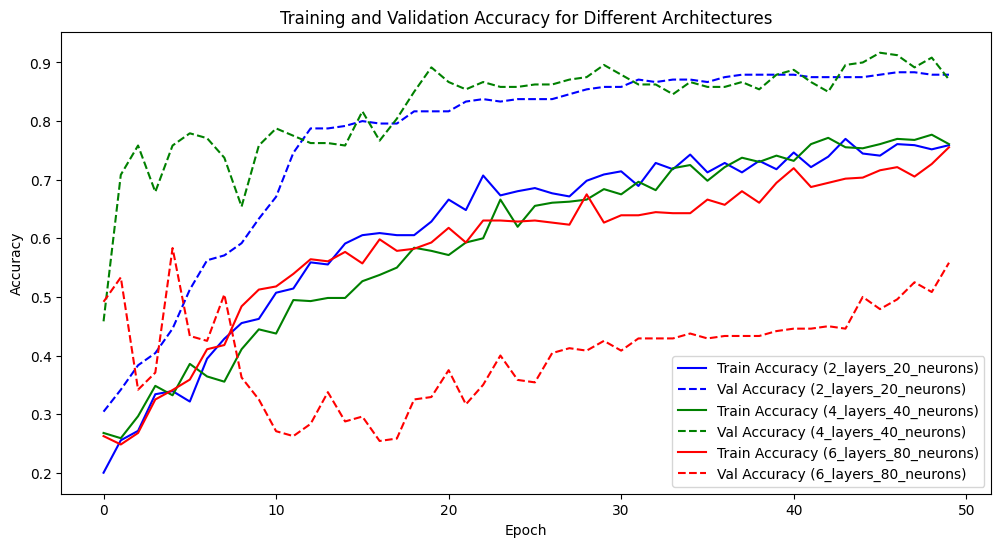

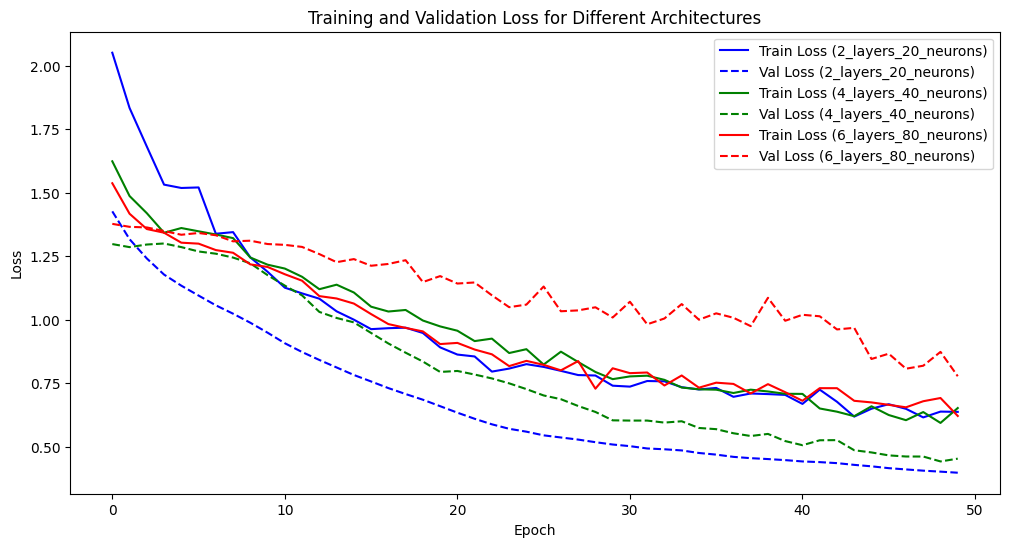

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Define the build and train function
def build_and_train_model(layers, neurons_per_layer, input_dim, dropout_rate=0.5, epochs=50, batch_size=32):
    model = Sequential()
    for _ in range(layers):
        model.add(Dense(neurons_per_layer, input_dim=input_dim, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for multi-class
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)
    return model, history

# Define architectures to experiment with
architectures = [
    (2, 20),  # 2 layers, 20 neurons each
    (4, 40),  # 4 layers, 40 neurons each (baseline)
    (6, 80),  # 6 layers, 80 neurons each
]

# Define colors for each architecture for better distinction
colors = {
    "2_layers_20_neurons": "blue",
    "4_layers_40_neurons": "green",
    "6_layers_80_neurons": "red",
}

# Collect history for each architecture
history_dict = {}
for (layers, neurons) in architectures:
    label = f"{layers}_layers_{neurons}_neurons"
    _, history = build_and_train_model(layers, neurons, input_dim=input_dim, dropout_rate=0.5)
    history_dict[label] = history

# Plot accuracy with specific colors for each architecture
plt.figure(figsize=(12, 6))
for label, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({label})', color=colors[label])
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Val Accuracy ({label})', color=colors[label])

plt.title('Training and Validation Accuracy for Different Architectures')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss with specific colors for each architecture
plt.figure(figsize=(12, 6))
for label, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({label})', color=colors[label])
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss ({label})', color=colors[label])

plt.title('Training and Validation Loss for Different Architectures')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Analysis of Accuracy Plot

    2 Layers, 20 Neurons (Blue Lines):
        Training Accuracy (Solid Blue): The training accuracy starts low and improves gradually, stabilizing around 0.6.
        Validation Accuracy (Dashed Blue): Validation accuracy follows a similar trend to the training accuracy, reaching around 0.6 as well, with slight fluctuations.
        Conclusion: This model is underfitting due to limited capacity. The training and validation accuracy are both low, indicating the model doesn’t have sufficient complexity to learn the underlying data patterns.

    4 Layers, 40 Neurons (Green Lines):
        Training Accuracy (Solid Green): The training accuracy improves steadily, reaching around 0.8 by the end of 50 epochs.
        Validation Accuracy (Dashed Green): Validation accuracy closely follows training accuracy and stabilizes around 0.75. It shows some fluctuation but generally maintains a close pattern to training accuracy.
        Conclusion: This configuration offers a balanced fit. It has sufficient complexity to learn the data without excessive overfitting, as shown by the close alignment between training and validation accuracy. This architecture generalizes well.

    6 Layers, 80 Neurons (Red Lines):
        Training Accuracy (Solid Red): The training accuracy rises quickly, achieving around 0.9, indicating the model can fit the training data well.
        Validation Accuracy (Dashed Red): The validation accuracy, however, remains much lower and fluctuates significantly, hovering around 0.5–0.6.
        Conclusion: This model is overfitting due to excessive capacity. It has learned the training data too well (high training accuracy) but fails to generalize, as shown by the low and unstable validation accuracy.

Analysis of Loss Plot

    2 Layers, 20 Neurons (Blue Lines):
        Training Loss (Solid Blue): The training loss starts high and decreases, stabilizing around 0.75 by the end of training.
        Validation Loss (Dashed Blue): The validation loss follows the training loss, plateauing around 0.8 with minimal improvement in the later epochs.
        Conclusion: This architecture is too simple, leading to underfitting. The close but high training and validation losses indicate that the model lacks the capacity to capture the data’s complexity.

    4 Layers, 40 Neurons (Green Lines):
        Training Loss (Solid Green): The training loss decreases steadily, reaching around 0.6.
        Validation Loss (Dashed Green): Validation loss also decreases, following a similar trend to the training loss and ending around 0.65.
        Conclusion: This architecture provides a good balance between capacity and generalization. The training and validation losses decrease consistently and remain close to each other, indicating the model is learning effectively without overfitting.

    6 Layers, 80 Neurons (Red Lines):
        Training Loss (Solid Red): The training loss drops sharply, reaching very low values, indicating that the model is effectively memorizing the training data.
        Validation Loss (Dashed Red): The validation loss decreases initially but then fluctuates and remains higher than the training loss, signaling instability and poor generalization.
        Conclusion: The sharp decline in training loss alongside high, fluctuating validation loss indicates overfitting. The model memorizes the training data but struggles with new data, as seen in the validation loss instability.

Final Recommendations

    Optimal Model: The 4-layer, 40-neuron architecture offers the best trade-off between capacity and generalization, making it the optimal choice for this dataset. It achieves high accuracy and low loss on both training and validation sets without overfitting.

    Avoid Overly Complex Models: The 6-layer, 80-neuron configuration shows clear signs of overfitting, with high training accuracy but poor generalization on the validation set. This is likely due to the model’s excessive capacity, which leads it to memorize the training data rather than learning generalizable patterns. Reducing complexity or adding regularization (like dropout or early stopping) may help mitigate overfitting if this architecture is necessary.

    Improve Simple Models: The 2-layer, 20-neuron model lacks the capacity to learn the data effectively, leading to underfitting. If computational resources allow, increasing the number of neurons or layers could help improve performance.

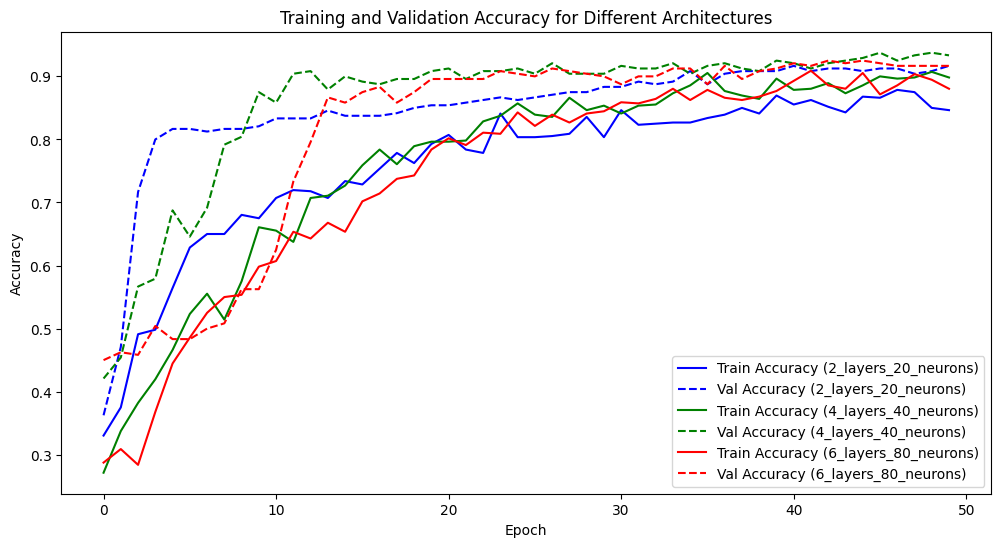

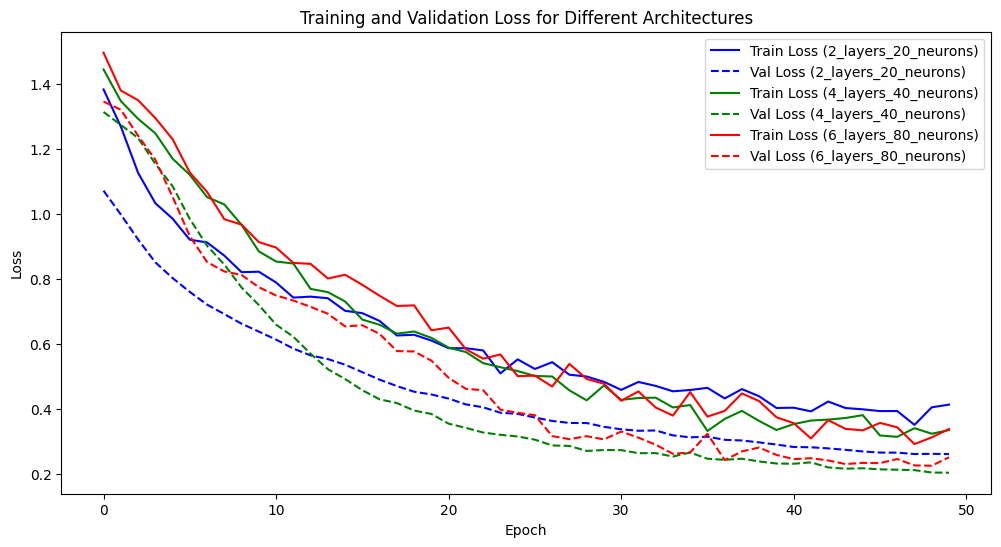

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Example data (replace X and y with your actual dataset)
# X, y = ... (Your dataset loading step)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# One-hot encode y_train and y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the build and train function
def build_and_train_model(layers, neurons_per_layer, input_dim, dropout_rate=0.5, epochs=50, batch_size=32):
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_dim=input_dim, activation='relu'))
    for _ in range(1, layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for multi-class classification
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)
    return model, history

# Define architectures to experiment with
architectures = [
    (2, 20),  # 2 layers, 20 neurons each
    (4, 40),  # 4 layers, 40 neurons each (baseline)
    (6, 80),  # 6 layers, 80 neurons each
]

# Define colors for each architecture for better distinction
colors = {
    "2_layers_20_neurons": "blue",
    "4_layers_40_neurons": "green",
    "6_layers_80_neurons": "red",
}

# Collect history for each architecture
history_dict = {}
for (layers, neurons) in architectures:
    label = f"{layers}_layers_{neurons}_neurons"
    _, history = build_and_train_model(layers, neurons, input_dim=X_train.shape[1], dropout_rate=0.5)
    history_dict[label] = history

# Plot accuracy with specific colors for each architecture
plt.figure(figsize=(12, 6))
for label, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({label})', color=colors[label])
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Val Accuracy ({label})', color=colors[label])

plt.title('Training and Validation Accuracy for Different Architectures')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss with specific colors for each architecture
plt.figure(figsize=(12, 6))
for label, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({label})', color=colors[label])
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss ({label})', color=colors[label])

plt.title('Training and Validation Loss for Different Architectures')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


### 5. Discuss the effect of batch normalization.


Batch normalization (BatchNorm) is a technique that normalizes the input of each layer in a neural network by adjusting and scaling the activations. It’s applied right after the linear transformation (such as a dense or convolutional layer) and before the activation function. Batch normalization operates by:

Calculating the mean and variance of each feature across a batch of data.
Normalizing each feature to have a mean of 0 and variance of 1 within the batch.
Scaling and shifting the normalized output by learned parameters (scale γ and shift β), which allows the model to learn optimal ranges for the activations.

## Effects of Batch Normalization

1 = Accelerated Training and Convergence:

By normalizing the activations, batch normalization reduces internal covariate shift, which is the change in the distribution of layer inputs during training. This stabilization of input distributions across layers allows for faster convergence.
Models with batch normalization typically require fewer epochs to reach a certain accuracy level, which makes training faster and more efficient.


2 = Higher Learning Rates:


Batch normalization enables the use of higher learning rates, which further accelerates training. Higher learning rates can sometimes destabilize training by causing large gradient updates, but batch normalization mitigates this by keeping activations stable.
With batch normalization, even aggressive learning rates tend to work well, as the normalization process controls the distribution of layer inputs, making the network more robust to such changes.



3 = Regularization and Reduced Overfitting:


Batch normalization has a slight regularizing effect. By relying on mini-batches to compute mean and variance, each batch’s statistics introduce some noise, which can act as a form of regularization. This can reduce the need for other regularization techniques like dropout (though they can be used together).
However, batch normalization is not a complete substitute for dropout, as it only indirectly reduces overfitting. For larger, more complex models, dropout and batch normalization are often used in tandem to improve generalization.




4 = Smoother Loss Surface:


Batch normalization tends to smooth the loss landscape, making the gradients more predictable and reducing the chance of oscillations or sharp jumps during training.
The smoother gradient flow helps in more stable and consistent training, reducing issues like vanishing/exploding gradients, which are common in deeper networks.



5 = Better Performance on Deeper Networks:

Deep networks are more prone to issues like vanishing gradients, which hamper their training. Batch normalization mitigates these issues, making deeper architectures more trainable and less sensitive to weight initialization.
As a result, batch normalization has contributed to the success of very deep networks (e.g., ResNet, Inception), as it allows for the effective training of networks with many layers.



6 = Reduced Sensitivity to Initialization:


Batch normalization reduces the network's sensitivity to weight initialization, meaning that the network can achieve good performance with a broader range of initialization methods. This simplifies the process of tuning initial weights and increases the likelihood of successful training.



NOTE :


Potential Reduction in Dropout: In many cases, batch normalization reduces the need for high dropout rates, as it provides its own form of regularization. However, a small amount of dropout (e.g., 0.2-0.3) can still be beneficial in large models or when overfitting is a concern.

6. Try different activation functions for the hidden layers. (https://keras.io/activations/)


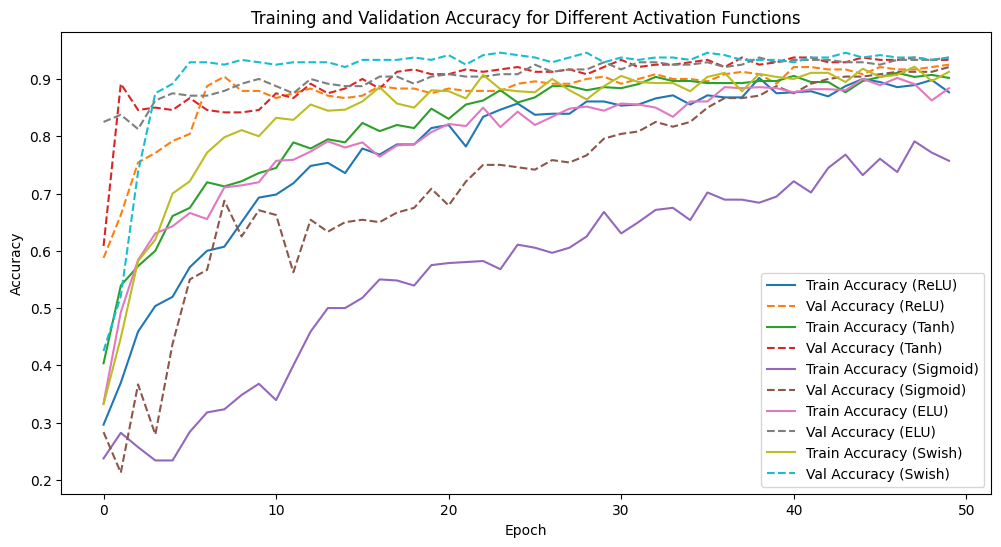

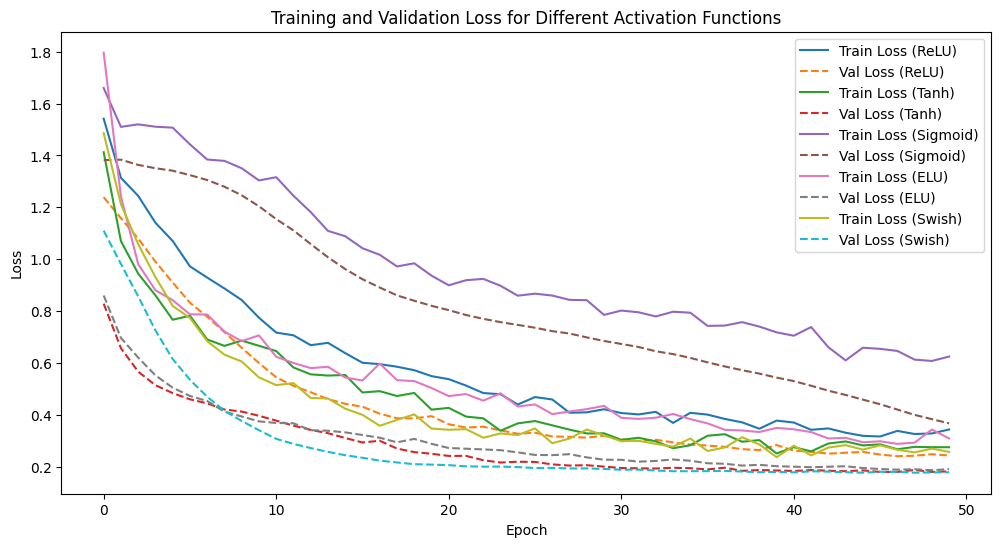

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Example data (replace X and y with your actual dataset)
# X, y = ... (Your dataset loading step)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the build and train function with customizable activation
def build_and_train_model(layers, neurons_per_layer, activation, input_dim, dropout_rate=0.5, epochs=50, batch_size=32):
    model = Sequential()
    for _ in range(layers):
        model.add(Dense(neurons_per_layer, input_dim=input_dim, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer for multi-class classification
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)
    return model, history

# Activation functions to experiment with
activations = ['relu', 'tanh', 'sigmoid', 'elu', 'swish']
activation_labels = ['ReLU', 'Tanh', 'Sigmoid', 'ELU', 'Swish']

# Store histories for each activation function
history_dict = {}
for activation, label in zip(activations, activation_labels):
    _, history = build_and_train_model(layers=3, neurons_per_layer=64, activation=activation, input_dim=X_train.shape[1])
    history_dict[label] = history

# Plot accuracy with different activations
plt.figure(figsize=(12, 6))
for label, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({label})')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Val Accuracy ({label})')

plt.title('Training and Validation Accuracy for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss with different activations
plt.figure(figsize=(12, 6))
for label, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({label})')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss ({label})')

plt.title('Training and Validation Loss for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


7. Try different initializers. (https://keras.io/initializers/)


Common Initializers and Their Effects

    RandomUniform:
        Description: Initializes weights with a uniform distribution in a specified range (usually small, such as between -0.05 and 0.05).
        Pros: Simple and effective for shallow networks.
        Cons: May lead to slow convergence or poor performance in deep networks.
        Usage: kernel_initializer='random_uniform'

    RandomNormal:
        Description: Initializes weights with a normal (Gaussian) distribution with specified mean and standard deviation.
        Pros: Effective for some networks, but not generally recommended for deep networks due to potential vanishing/exploding gradients.
        Usage: kernel_initializer='random_normal'

    He Normal (He Initialization):
        Description: Initializes weights with values drawn from a normal distribution, scaled by sqrt(2 / fan_in), where fan_in is the number of input units in the weight tensor.
        Pros: Designed for ReLU and variants; helps avoid vanishing/exploding gradients in deep networks.
        Usage: kernel_initializer='he_normal'

    He Uniform:
        Description: Similar to He Normal, but with a uniform distribution. Scales weights based on the number of input units.
        Pros: Works well with ReLU activations in deep networks.
        Usage: kernel_initializer='he_uniform'

    Glorot Normal (Xavier Initialization):
        Description: Initializes weights from a normal distribution scaled by sqrt(1 / fan_in + fan_out), where fan_in and fan_out are the numbers of input and output units.
        Pros: Works well with tanh and sigmoid activations in moderate-depth networks.
        Usage: kernel_initializer='glorot_normal'

    Glorot Uniform:
        Description: Similar to Glorot Normal but uses a uniform distribution.
        Pros: Good for shallow or moderate-depth networks with tanh or sigmoid activations.
        Usage: kernel_initializer='glorot_uniform'

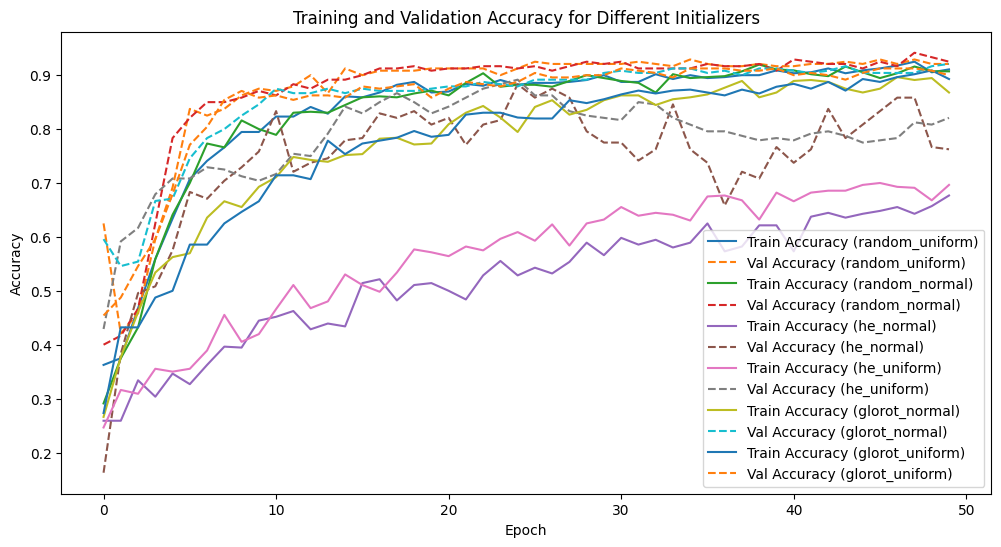

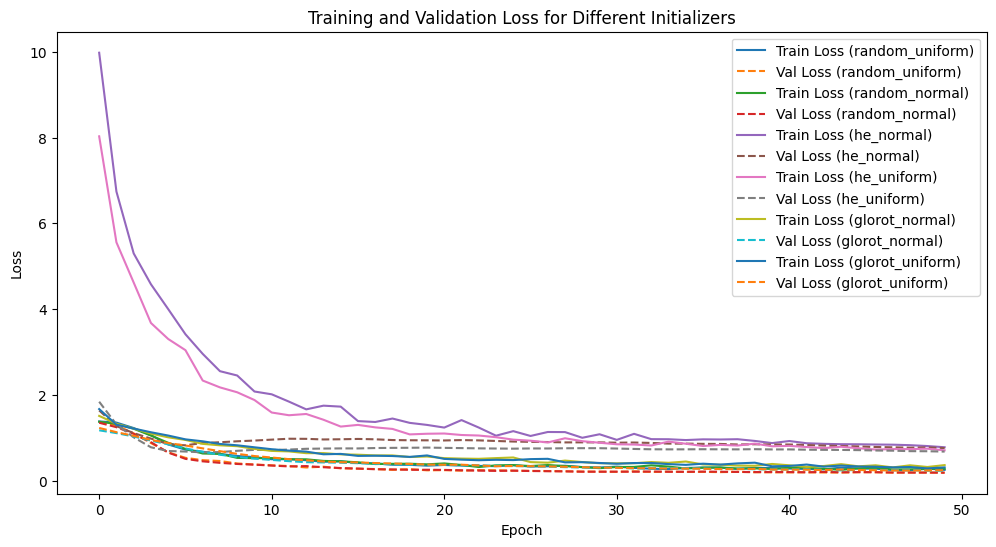

In [ ]:
from tensorflow.keras.initializers import RandomNormal, RandomUniform, HeNormal, HeUniform, GlorotNormal, GlorotUniform

# List of initializers to test
initializers = [
    ('random_uniform', RandomUniform()),
    ('random_normal', RandomNormal()),
    ('he_normal', HeNormal()),
    ('he_uniform', HeUniform()),
    ('glorot_normal', GlorotNormal()),
    ('glorot_uniform', GlorotUniform()),
]

# Function to build and train model with a specified initializer
def build_and_train_model_with_initializer(layers, neurons_per_layer, initializer, input_dim, dropout_rate=0.5, epochs=50, batch_size=32):
    model = Sequential()
    for _ in range(layers):
        model.add(Dense(neurons_per_layer, input_dim=input_dim, kernel_initializer=initializer, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(y_train.shape[1], kernel_initializer=initializer, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=0)
    return model, history

# Collect histories for each initializer
history_dict = {}
for (name, initializer) in initializers:
    _, history = build_and_train_model_with_initializer(3, 64, initializer, input_dim=X_train.shape[1])
    history_dict[name] = history

# Plot accuracy with different initializers
plt.figure(figsize=(12, 6))
for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({name})')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Val Accuracy ({name})')

plt.title('Training and Validation Accuracy for Different Initializers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss with different initializers
plt.figure(figsize=(12, 6))
for name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({name})')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss ({name})')

plt.title('Training and Validation Loss for Different Initializers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


8. Perform hyperparameter tuning in order to achieve the highest test accuracy.


Key Parameters to Tune

    Number of Layers and Neurons: Start with a range of 2-6 layers, and tune neurons between 32-128 for each layer.
    Dropout Rate: Explore values between 0.2 to 0.5 to find the ideal amount of regularization.
    Learning Rate: Typical values to test are 0.01, 0.001, and 0.0001.
    Activation Function: Test relu, tanh, and elu as potential activations for the hidden layers.
    Initializer: Try he_normal (for ReLU) and glorot_uniform (for tanh or sigmoid).

In [ ]:
import keras_tuner as kt
from tensorflow.keras.layers import BatchNormalization

# Define a hypermodel function
def build_hypermodel(hp):
    model = Sequential()

    # Tune the number of layers
    for i in range(hp.Int('num_layers', 2, 6)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh', 'elu']),
            kernel_initializer=hp.Choice('initializer', ['he_normal', 'glorot_uniform'])
        ))
        model.add(Dropout(rate=hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))

    model.add(Dense(y_train.shape[1], activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_hypermodel,
    objective='val_accuracy',
    max_trials=10,  # Adjust based on available computational resources
    executions_per_trial=2,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_split=0.3)

# Retrieve the best model and evaluate it on the test set
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best Test Accuracy: {test_accuracy:.2f}")


Trial 10 Complete [00h 00m 36s]
val_accuracy: 0.8958333432674408

Best val_accuracy So Far: 0.9458333253860474
Total elapsed time: 00h 05m 39s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.9260 - loss: 0.2614
Best Test Accuracy: 0.90


## Customer satisfaction


A bank wants to use deep learing to detect customer dissatisfaction.
Given is the dataset "customersatisfaction.csv". It consists of anonymized client data ( and features) and the resulting customer satisfaction (target = 1: unsatisfied customer, target = 0: satisfied customer).

Questions:

- Check the data: is the data balanced? Are there missing values?
- Do the necessary preprocessing.
- Train a feed forward neural network that achieves the highest accuracy possible. This involves hyperparameter tuning. Use a test set of at least 10000 samples.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Load the dataset
data = pd.read_csv('/content/customersatisfaction.csv')

print(data['TARGET'].value_counts())  # Check for balance in TARGET variable


TARGET
0    73012
1     3008
Name: count, dtype: int64


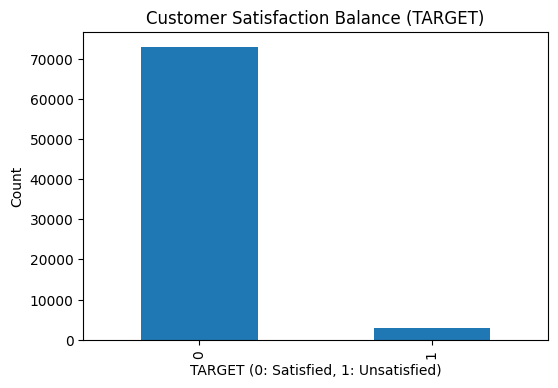

In [3]:
# Plot class distribution
plt.figure(figsize=(6,4))
data['TARGET'].value_counts().plot(kind='bar', title='Customer Satisfaction Balance (TARGET)')
plt.xlabel('TARGET (0: Satisfied, 1: Unsatisfied)')
plt.ylabel('Count')
plt.show()

In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values


,0
ID,0
var3,0
var15,0
imp_ent_var16_ult1,0
imp_op_var39_comer_ult1,0
...,...
saldo_medio_var44_hace3,0
saldo_medio_var44_ult1,0
saldo_medio_var44_ult3,0
var38,0


In [5]:
# Separate features and target
X = data.drop(columns=['ID', 'TARGET'])
y = data['TARGET']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=10000, random_state=0)

In [9]:
from imblearn.over_sampling import BorderlineSMOTE
# Apply BorderlineSMOTE to balance the training data
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X_train, y_train)

X_train_fold shape: (81792, 369), y_train_fold shape: (81792,)
X_val_fold shape: (20448, 369), y_val_fold shape: (20448,)
Class weights for current fold: {0: 1.0016164584864071, 1: 0.9983887505492895}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Error during model training: 8
639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
X_train_fold shape: (81792, 369), y_train_fold shape: (81792,)
X_val_fold shape: (20448, 369), y_val_fold shape: (20448,)
Class weights for current fold: {0: 1.0003913894324854, 1: 0.9996089166992569}
Error during model training: 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


639/639 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
X_train_fold shape: (81792, 369), y_train_fold shape: (81792,)
X_val_fold shape: (20448, 369), y_val_fold shape: (20448,)
Class weights for current fold: {0: 0.9977310985874259, 1: 1.0022792441732224}
Error during model training: 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


639/639 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
X_train_fold shape: (81792, 369), y_train_fold shape: (81792,)
X_val_fold shape: (20448, 369), y_val_fold shape: (20448,)
Class weights for current fold: {0: 0.9986569314546654, 1: 1.0013466859283564}
Error during model training: 3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


639/639 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
X_train_fold shape: (81792, 369), y_train_fold shape: (81792,)
X_val_fold shape: (20448, 369), y_val_fold shape: (20448,)
Class weights for current fold: {0: 1.0016164584864071, 1: 0.9983887505492895}
Error during model training: 2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


639/639 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Average Cross-Validation Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8077 - loss: 0.4411
Epoch 2/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8443 - loss: 0.3765
Epoch 3/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8499 - loss: 0.3662
Epoch 4/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8572 - loss: 0.3535
Epoch 5/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8631 - loss: 0.3464
Epoch 6/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8651 - loss: 0.3389
Epoch 7/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8660 - loss: 0.3369
Epoch 8/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8681 - loss: 0.3356
Epoch 9/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8703 - loss: 0.3286
Epoch 10/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8723 - loss: 0.3270
Epoch 11/30
3195/3195 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8745 - loss: 0.3223
Epoch 12/30
3195/3195 ━━━

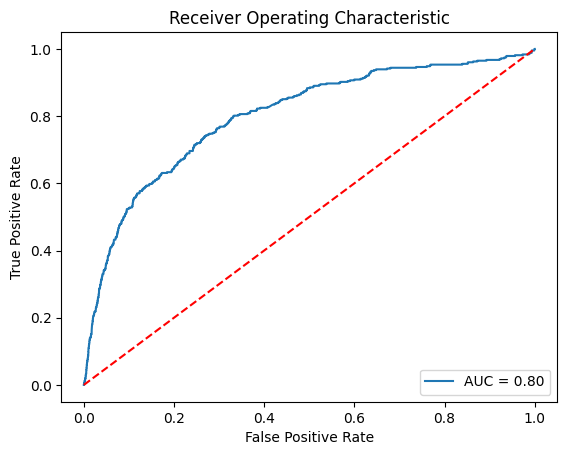

In [13]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight



# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(enumerate(class_weights))

# Function to create and train the model
def create_model(dropout_rate=0.2, activation='relu', neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_resampled.shape[1], kernel_initializer='he_uniform'))  # Use He initializer
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(neurons, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    return model

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_accuracy = []

for train_index, val_index in kf.split(X_resampled):
    X_train_fold, X_val_fold = X_resampled[train_index], X_resampled[val_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[val_index]

    # Check shapes
    print(f"X_train_fold shape: {X_train_fold.shape}, y_train_fold shape: {y_train_fold.shape}")
    print(f"X_val_fold shape: {X_val_fold.shape}, y_val_fold shape: {y_val_fold.shape}")

    # Calculate class weights for the current fold
    class_weights = class_weight.compute_class_weight('balanced',
                                                       classes=np.unique(y_train_fold),
                                                       y=y_train_fold)
    class_weights_dict = dict(enumerate(class_weights))
    print(f"Class weights for current fold: {class_weights_dict}")

    model = create_model()

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    try:
        history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold),
                            epochs=30, batch_size=32, verbose=1,
                            callbacks=[early_stopping], class_weight=class_weights_dict)
    except Exception as e:
        print(f"Error during model training: {e}")

    # Evaluate on validation set
    val_predictions = (model.predict(X_val_fold) > 0.5).astype('int32')
    acc = accuracy_score(y_val_fold, val_predictions)
    all_accuracy.append(acc)

# Print average accuracy across all folds
print(f'Average Cross-Validation Accuracy: {np.mean(all_accuracy):.2f}')

# Final evaluation on the test set
final_model = create_model()  # Create a new model for final evaluation
final_model.fit(X_resampled, y_resampled, epochs=30, batch_size=32, verbose=1, class_weight=class_weights_dict)

# Split the original data for final testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=0)

# Evaluate on the test set
y_pred = (final_model.predict(X_test) > 0.5).astype('int32')

# Test Classification Report
print('\nTest Classification Report:\n', classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cf)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# ROC Curve and AUC calculation
preds = final_model.predict(X_test).ravel()  # Get predictions
fpr, tpr, thresholds = roc_curve(y_test, preds)  # Compute ROC curve
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')  # Plot AUC
plt.plot([0, 1], [0, 1], 'r--')  # Plot diagonal line
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Zalando fashion-MNIST

The Fashion-MNIST dataset consists of thousands of grey-valued images of clothes from 10 different classes:
0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'.

The training set and test set are provided.

Train a neural network that achieves the highest accuracy possible on the test set.
One option is to use the raw pixel data as input to the neural network. Another approach is first reduce the dimensionaly of the dataset by applying Principle Component Analysis (PCA).

Visualize some misclassified images. Can you explain why they have been misclassified?

Compare your own result with the ones on https://github.com/zalandoresearch/fashion-mnist.


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

In [15]:
# Load the datasets
df_train = pd.read_csv('/content/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/fashion-mnist_test.csv')

In [16]:
# Separate features and target
X_train = df_train.drop(columns=['label']).values  # Features
y_train = df_train['label'].values  # Target labels
X_test = df_test.drop(columns=['label']).values  # Test features
y_test = df_test['label'].values  # Test labels

In [17]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [19]:
# Define the model-building function
def create_model(dropout_rate=0.3, activation='relu', neurons=128):
    model = Sequential()

    # Input Layer
    model.add(Dense(neurons, input_dim=X_resampled.shape[1], kernel_initializer='uniform'))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    # Hidden Layer 1
    model.add(Dense(neurons * 2, kernel_initializer='uniform'))  # Increase neurons
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    # Hidden Layer 2
    model.add(Dense(neurons, kernel_initializer='uniform'))  # Another layer
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

In [22]:
# Create the model
model = create_model()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_resampled, y_resampled, validation_split=0.2,
                    epochs=50, batch_size=64, verbose=1,
                    callbacks=[early_stopping])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7262 - loss: 0.7885 - val_accuracy: 0.8514 - val_loss: 0.4043
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8331 - loss: 0.4668 - val_accuracy: 0.8657 - val_loss: 0.3736
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8511 - loss: 0.4112 - val_accuracy: 0.8717 - val_loss: 0.3567
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8573 - loss: 0.3982 - val_accuracy: 0.8712 - val_loss: 0.3489
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8617 - loss: 0.3804 - val_accuracy: 0.8738 - val_loss: 0.3459
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8715 - loss: 0.3516 - val_accuracy: 0.8804 - val_loss: 0.3277
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8709 - loss: 0.3496 - val_accuracy: 0.8817 - val_loss: 0.3285
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8731 - loss: 0.3401 - val_accuracy: 0.

In [23]:
# Evaluate on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Test Classification Report
print('\nTest Classification Report:\n', classification_report(y_test, y_pred_classes))
cf = confusion_matrix(y_test, y_pred_classes)
print('\nConfusion Matrix:\n', cf)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_classes) * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.99      0.99      1000
           2       0.84      0.80      0.82      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.86      0.85      1000
           5       0.98      0.94      0.96      1000
           6       0.71      0.71      0.71      1000
           7       0.93      0.94      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
 [[837   1   8  21   0   0 127   0   6   0]
 [  2 986   2   8   0   1   1   0   0   0]
 [ 15   0 798  10  92   0  84   0   1   0]
 [ 35  11   6 906  25

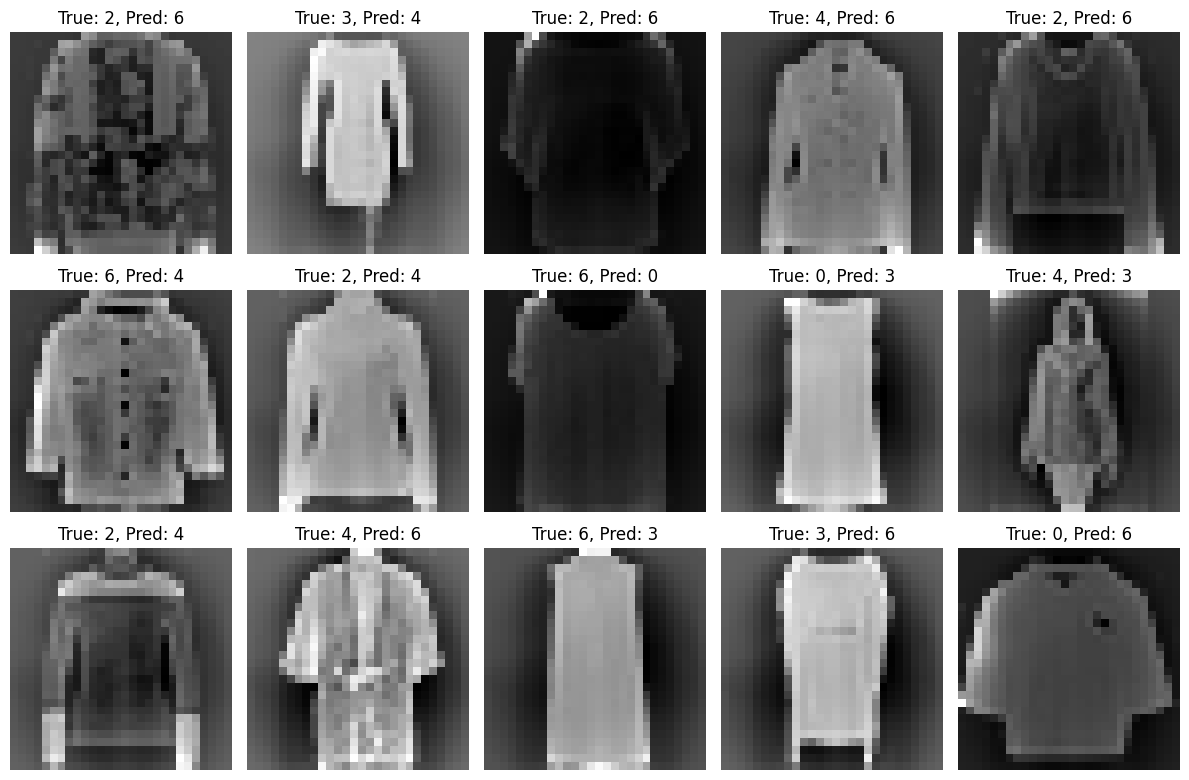

In [24]:
# Visualize some misclassified images
misclassified_indices = np.where(y_pred_classes != y_test)[0]
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:15]):  # Display first 15 misclassified images
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[idx]}, Pred: {y_pred_classes[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

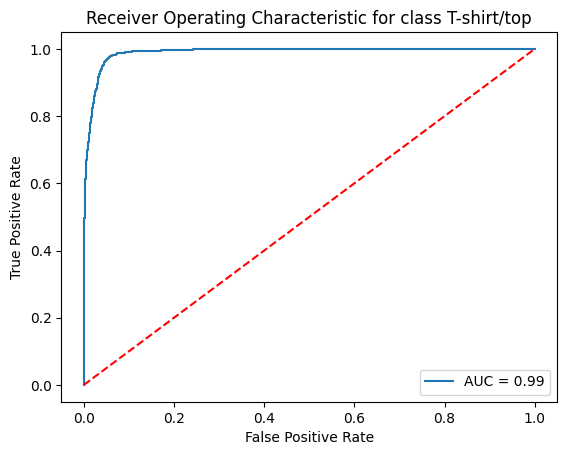

In [25]:
# ROC Curve and AUC calculation for a specific class (e.g., class '0': T-shirt/top)
y_test_binary = (y_test == 0).astype(int)  # Example for class '0'
y_pred_proba = y_pred[:, 0]  # Get probabilities for class '0'

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic for class T-shirt/top')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()